<a href="https://colab.research.google.com/github/DhanieArdiyan/ASE2306-Capstone-Project/blob/main/Capstone_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS
Sentiment Analysis refers to the use of Natural Language Processing, Text Analysis, and Computational Linguistic to systematically identify, extract, and quantify whether a piece of writing is positive, negative, or neutral. It can be used as a predictive modelling task where the model can be trained to predict the polarity of such textual data. Some applications would include social media monitoring and gauging customers' experiences of the company's products.

Ideally, the second phase of the project aims to use Sentiment Analysis to understand passenger's opinions with regards to their thermal comfort inside the aircaft cabin. These opinions would revolve around the variables that were previously calculated in the PMV PPD model, done in the first phase of the project. Examples of valuable feedbacks would include how the passenger felt when there was enough wind velocity (or drafts), or if they experienced discomfort due to the pressurisation of aircraft cabin, etc.

Hence, the purpose of Sentiment Analysis is to use the passengers' sentiments to complement the calculated values of PMV PPD model. This would then justify the optimum condition the aircraft cabin that will cause the least passenger thermal dissatisfaction. 

There are various ways to data mine and extract feedbacks from social media like Twitter, Facebook and Reddit. For the purpose of this project, I will be focusing on Twitter and utilising its API.

In [ ]:
pip install stopwords

In [ ]:
pip install nltk

In [ ]:
pip install wordcloud

# 1. INITIALISATION & AUTHORISATION STAGE
Just a note, the consumer_key, consumer_secret, access_token, access_token_secret are unique to my own Twitter Developer account access. 

If test run is unsuccessful, do contact me for verification.

In [ ]:
#START INITIALISATION
from textblob import TextBlob
from wordcloud import WordCloud
import re
import pandas as pd 
import numpy as np 
import sys, tweepy
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

def percentage(part, whole):
	return 100 * float(part)/float(whole)

consumer_key = "duCD34AKM0yj2FJGe1vOomirc"
consumer_secret = "aKkRF84oLs3pGm5gJzPavojoI23WZXMxrv4FWGZMKWnnSCoF1r"
access_token = "1284696550740901893-xwi5gsHUdnwnD1ztZbSyVdhe6ZWdev"
access_token_secret = "y8yNJJIxXtKiUgeY6kh8xWNSGEssNdCAdTIwQqnqR57yk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth, wait_on_rate_limit=True) 

# 2. EXTRACTING TWEETS
This part of the codes consists of the main program extracting the tweets. There are 3 ways in which the user can extract the tweets:

1.   Input the keyword only
2.   Skip the keyword, and input username only
3.   Input keyword + username (finding keywords in one specific account)

Numerous efforts and trials had been made to extract data that are relatable to the project, only to return irrelevant tweets. This is due to the coronavirus pandemic that had grounded the aviation industry for 8 months, which does not permit passenger travel. As such, it is close to none that people are tweeting about their experiences in aircraft cabin, other than them missing travelling.


Nonetheless, the program would still run perfectly for other queries. For this case we will using Option 2: Analysing tweets under the account of ChannelNewsAsia. We will analyse 100 tweets (the max count), and the list will display the most recent 100 tweets, up to 7 days ago (a limitation of using the standard Tweepy API). 


KEYNOTES:

Polarity - A float which lies in the range between -1 to 1, where 1 would equate to a positive statement and -1 would equate to a negative statement. 

Subjectivity - Sentences which generally refer to personal opinions, emotion or judgement. It is also a float which lies in the range between 0 to 1.





In [ ]:
#EXTRACTING TWEETS
keyWord = input("Enter the keyword you are searching for (skip if NA):  ") #search by keyword
UserName = input("Enter the Twitter username (excluding @, skip if NA): ") #search by username
inputString = keyWord +" from:" + UserName
print ('\n')
print ('RESULTS:')

public_tweets = api.search(q=inputString, count=100, lang = "en")

i = 1
for tweet in public_tweets:
  print ('\n')
  print ((str(i) + ') ' + tweet.text))
  print (('Tweeted by') + ': ' + str(tweet.user.screen_name))
  print (('Tweeted at') + ': ' + str(tweet.user.location))
  print (('Tweeted on') + ': ' + str(tweet.created_at))
  i=i+1
  # print(tweet.text)

#IF I want to print the latest 5 tweets from the account
# print("Show the 5 recent tweets: \n")
# i = 1
# for tweet in posts [0:5]:
#     print ((str(i) + ') ' + tweet.full_text + '\n'))
#     i = i + 1

#Creating a dataframe with a column called Tweets
df = pd.DataFrame ([tweet.text for tweet in public_tweets], columns = ['Tweets'])

#Show first 5 rows of data
df.head()

#function to clean the tweets
def cleanTxt(text):
	text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
	text = re.sub(r'#', '', text) #removes the '#'
	text = re.sub(r'RT[\s+]+', '', text) #removing RT
	text = re.sub(r'https?:\/\/\S+', '', text) #removes hyperlinks
	return text

#cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

#Subjectivity function
def getSubjectivity(text):
	return TextBlob(text).sentiment.subjectivity

#Polarity function
def getPolarity(text):
	return TextBlob(text).sentiment.polarity

#Creating columns for Subjectivity and Polarity
df ['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df ['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df


Enter the keyword you are searching for (skip if NA):  
Enter the Twitter username (excluding @, skip if NA): channelnewsasia


RESULTS:


1) Germany reports new daily record in COVID-19 cases https://t.co/GEFswIMwQO https://t.co/W4taxVeZVz
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 10:57:03


2) 6 countries reported COVID-19 in mink farms, say WHO https://t.co/zCMUOEIizM https://t.co/yEJmGeigr9
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 10:33:03


3) COVID-19 conditional movement control order reinstated across all states in Peninsular Malaysia, except for Perlis,… https://t.co/6htMwl5KsU
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 10:06:33


4) COVID-19: Britain bans entry to all travellers from Denmark https://t.co/lVTjR6DoAw https://t.co/mrllegHcVQ
Tweeted by: ChannelNewsAsia
Tweeted at: Singapore
Tweeted on: 2020-11-07 10:06:32


5) Wolves have room for improvement, says Nuno https://t.co/sOrr

,Tweets,Subjectivity,Polarity
0,Germany reports new daily record in COVID-19 c...,0.227273,0.068182
1,"6 countries reported COVID-19 in mink farms, s...",0.000000,0.000000
2,COVID-19 conditional movement control order re...,0.000000,0.000000
3,COVID-19: Britain bans entry to all travellers...,0.000000,0.000000
4,"Wolves have room for improvement, says Nuno",0.000000,0.000000
...,...,...,...
95,CVS Health CEO Larry Merlo to step down next y...,0.144444,-0.077778
96,Rossi cleared to race at European GP after sec...,0.133333,-0.100000
97,US state of Georgia says it will recount razor...,0.000000,0.000000
98,McConnell: Signs of economic recovery point to...,0.350000,0.100000


# 3. PLOTTING WORDCLOUD
WordCloud is a data visualization technique used for representing text data, in which the size of each word indicates its frequency or importance. If the same words are detected very frequently, then the size of that particular word will be very big in the wordcloud.

I'm having trouble at this part (seen in my error as attached). I have tried to troubleshoot it by researching various example but I can't seem to understand the problem.

In [ ]:
# #Plotting WORDCLOUD
from wordcloud import WordCloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 5000, height = 300, random_state = 21, max_font_size = 100).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear") #bilinear to make displayed image more smooth
plt.axis('off')
plt.show()



TypeError: ignored

In [ ]:
#Computing the negative, neutral, positive analysis
def getAnalysis (score):
	if score < 0:
		return 'Negative'
	elif score == 0:
		return 'Neutral'
	else:
		return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df


,Tweets,Subjectivity,Polarity,Analysis
0,Germany reports new daily record in COVID-19 c...,0.227273,0.068182,Positive
1,"6 countries reported COVID-19 in mink farms, s...",0.000000,0.000000,Neutral
2,COVID-19 conditional movement control order re...,0.000000,0.000000,Neutral
3,COVID-19: Britain bans entry to all travellers...,0.000000,0.000000,Neutral
4,"Wolves have room for improvement, says Nuno",0.000000,0.000000,Neutral
...,...,...,...,...
95,CVS Health CEO Larry Merlo to step down next y...,0.144444,-0.077778,Negative
96,Rossi cleared to race at European GP after sec...,0.133333,-0.100000,Negative
97,US state of Georgia says it will recount razor...,0.000000,0.000000,Neutral
98,McConnell: Signs of economic recovery point to...,0.350000,0.100000,Positive


# 4. SEGREGATING SENTIMENTS
The following parts that follow will classify the tweets based on their sentiments, either Positive, Negative, or Neutral. A Bar graph and a Scatter plot would also help to assist in illustration to observe how the tweets of the user are feeling.

As we can observe, there are certain tweets which were not classified accurately. For example under the first few positive tweets, it should not be regarded as a positive sentiment. As a human reader, we would understand that it would be better suited to be classified as a negative sentiment (having a Covid case is undesirable).

This would question the accuracy of the sentiment analysis, which if given more time, I would gladly love to continue the project. 


In [ ]:
#To seperate and print POSITIVE tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
	if (sortedDF['Analysis'][i] == 'Positive'):
		print (str(j) + ') '+sortedDF['Tweets'][i])
		print()
		j = j + 1


1) Germany reports new daily record in COVID-19 cases  

2) 7 new COVID-19 cases in Singapore, all imported  

3) Singapore reports 7 new COVID19 cases, all imported: MOH
 

4) Important to talk about mental health, says Chelsea's Chilwell  

5) Netherlands' Miedema backs Wiegman for England success  

6) Joe Biden projects confidence he will win White House with 'clear majority'  

7) China exports remain strong in October, import growth slows  

8) VIDEO: The latest job market figures showed Singapore's unemployment rate climbing to a 16-year high. When will thi… 

9) China reports 33 new coronavirus cases  

10) Soccer-Sassuolo held by Udinese, miss chance to top Serie A  

11) Southwest Airlines issues notices of furloughs for first time in 49-year existence  

12) Johnny Depp is out of Fantastic Beasts after losing 'wife beater' case  

13) Football: Southampton go top with 2-0 win over Newcastle  

14) Rossi OK to race but Yamaha boss goes into quarantine  

15) Analysis: High-fl

In [ ]:
#To seperate and print NEGATIVE tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print (str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j + 1

1) A look at Myanmar's election and Aung San Suu Kyi's expected victory  

2) In India, polluted air spells trouble for COVID-19 patients  

3) "Let's put the anger and demonisation behind us. It's time for us to come together as a nation to heal": Joe Biden… 

4) Former Singapore international footballer Salim Moin dies aged 59  

5) Why is US vote count taking so long?  

6) Commentary: What's behind claims of electoral fraud in US elections  

7) Commentary: The never-ending political game of Mahathir Mohamad  

8) Stressed out, anxious and unable to focus? Here are 10 ways to calm down  

9) Republicans seeking to raise at least US$60 million to fund Trump legal challenges  

10) Brazil off to bad start on Paris climate deal: Watchdog  

11) Europe COVID-19 deaths surge past 300,000  

12) Trump faces tough road in getting Supreme Court to intervene  

13) Wall Street Week Ahead: Small caps join market rally but pandemic could derail them  

14) Small group of Southwest workers rec

In [ ]:
#To seperate and print NEUTRAL tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
	if (sortedDF['Analysis'][i] == 'Neutral'):
		print (str(j) + ') '+sortedDF['Tweets'][i])
		print()
		j = j + 1


1) 6 countries reported COVID-19 in mink farms, say WHO  

2) COVID-19 conditional movement control order reinstated across all states in Peninsular Malaysia, except for Perlis,… 

3) COVID-19: Britain bans entry to all travellers from Denmark  

4) Wolves have room for improvement, says Nuno  

5) Tesco gets nod for sale of Thailand supermarket business  

6) Books? Hairdressers? Europeans split on COVID-19 lockdown essentials  

7) Djokovic clinches sixth year-end No. 1 ranking to tie Sampras  

8) Japan star sees gymnastics event as 'model' for Olympics  

9) Not waiting: Biden transition team at work amid limbo  

10) Not waiting: Biden transition team at work amid limbo  

11) Trump chief of staff Meadows diagnosed with COVID-19  

12) Newcastle boss Bruce sweats over fitness of striker Wilson  

13) COVID-19: Australia to allow additional 450 citizens to return before end of 2020  

14) Supreme Court denies immediate halt of Pennsylvania count  

15) US COVID-19 cases hit record 

In [ ]:
#POSITIVE TWEETS in %
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

positive = round ( (ptweets.shape[0]/df.shape[0]) * 100, 1)
positive

38.0

In [ ]:
#NEGATIVE TWEETS in %
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

negative = round ( (ntweets.shape[0]/df.shape[0]) * 100, 1)
negative

17.0

In [ ]:
#NEUTRAL TWEETS in %
100 - positive - negative

45.0

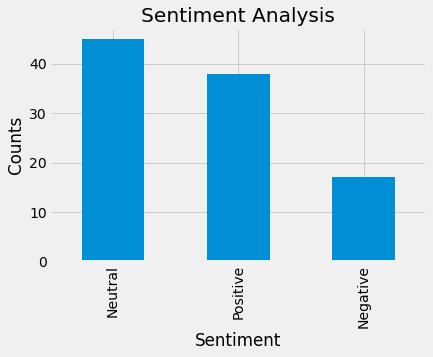

In [ ]:
#BAR GRAPH - POSITIVE, NEGATIVE, NEUTRAL
df['Analysis'].value_counts()

#plot and visualise the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

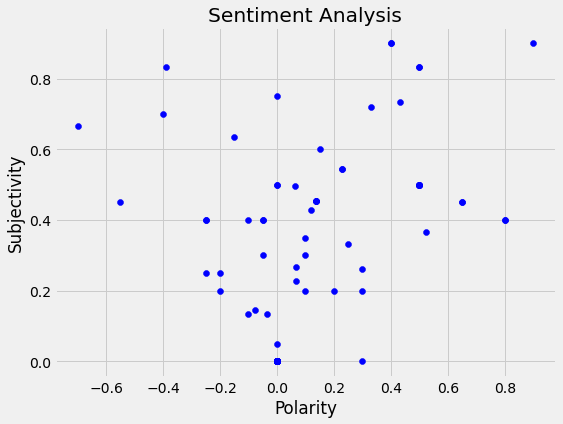

In [ ]:
#SCATTER PLOT - POLARITY AND SUBJECTIVITY
plt.figure(figsize = (8,6))
for i in range (0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue') #(x,y axis)

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# ATTEMPTS TO MEASURE THE ABOVE SENTIMENT ACCURACY
While the above program provides the sentiment result classifications, which are then further calculated into percentages, how can we determine that the program is accurate? We can observe that some of the tweets do not belong into their respective categories, for eg. a positive tweet determined in the program would be better suited to be classified as negative if it was a sarcastic tweet. How then can we identify its accuracy?

This part of the project aims to code another program that will use the same dataset as the program above, which will then be compared and cross-checked with the accuracy of percentages and classification of tweets. 

Extensive research has been done to determine the best possible method to conduct the analysis. The following methods are chosen due to their relevance to this project:


1.   RandomForestClassifier Algorithm
2.   LSTM and RNN
3.   SVM with Python's Scikit-Learn









# ATTEMPT 1: Training model by RandomForestClassifier Algorithm

Random forests is a supervised learning algorithm and considered as the most flexible and easy to use algorithm. It can be used for both classification and regression. A forest is comprised of trees and the more trees it has, the more robust a forest is. Hence, random forests creates decision trees based on randomly selected data samples, gets prediction from each tree, and selects the best solution by means of voting. It also provides a good indicator of the feature importance. Such applications include recommendation search engines that are heavily used.

The field of sentiment analysis involves some form of the data mining process to extract the text, later carried out in  the machine  learning to be built. As such using the Random Forest approach would be ideal, owing to its ability to act upon non-normalised data.

In [ ]:
# Link: https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/
# Resource: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

# IMPORTING LIBRARIES AND DATA CLEANING
Tweets may contain many slang words and punctuation marks, and we need to clean the tweets first before they can be used to train the machine learning model.

To do, we will use regular expresions for text manipulation, already installed in Python's package. 

In [ ]:
# import matplotlib.pyplot as plt 
# import nltk
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# processed_features = []
# features = df['Tweets']


# for sentence in range(0, len(features)):
#     # Remove all the special characters
#     processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

     # remove all single characters
#     processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

#     # Remove single characters from the start
#     processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

#     # Substituting multiple spaces with single space
#     processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

#     # Removing prefixed 'b'
#     processed_feature = re.sub(r'^b\s+', '', processed_feature)

#     # Converting to Lowercase
#     processed_feature = processed_feature.lower()

#     processed_features.append(processed_feature)

# processed_features

Next, we will use the Python's Scikit-Learn library which contains the 'TfidVectorizer' class that can be used to convert text features into TF-IDF feature vectors.

A TF-IDF (Term-Frequency and Inverse Document Frequency) algorithm is one of 3 ways that can make statistical algorithms work with text (since mathematics only work with numbers). The tweets and data will be converted into numeric form through this algorithm. 

*The other two methods are Bag of Words, and Word2Vec.

NOTE: I would really like to make this algorithm work because it seems to be most promising and relatable. Unfortunately, I came across problems with TfidVectorizer and after multiple searches, I really don't understand the solutions. I can't progress ever since.

In [ ]:
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
# processed_features = vectorizer.fit_transform(processed_features).toarray()

# #max_features = most frequently occuring words to create a bag of words feature vector
# #max_df = specifies to only using words that occur in a maximum of 80% of the docs
# #min_df = similar, include words that occur in at least 7 docs

Here, we will be dividing our data into training and testing sets. The training set will be used to train the algorithm while the test set will be used to evaluate the performance of the machine learning model.

We use the train_test_split class from the sklearn.model_selection module to divide our data into training and testing set.

Test size is set to a value of 0.2, which means that our data set will be split into two sets of 80% and 20% data. We will use the 80% dataset for training and 20% dataset for testing.

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(processed_features, df, test_size=0.2, random_state=0)

# TRAINING THE MODEL

Once the data above is split into training and test set, we can now use RandomForest to learn from the training data. 

The sklearn.ensemble module contains the RandomForestClassifier class that can be used to train the machine learning model. We need to call the fit method on the RandomForestClassifier class and pass it our training features and labels, as parameters. 

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler

# text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
# text_classifier.fit(X_train, y_train)

Once the model has been trained, the last step is to make predictions on the model by calling the predict method on the object of the RandomForestClassifier class that we used for training.

In [ ]:
# predictions = text_classifier.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,predictions))
# print(classification_report(y_test,predictions))
# print(accuracy_score(y_test, predictions))

The following picture illustrates an example of how the results are portrayed if the program runs smoothly.

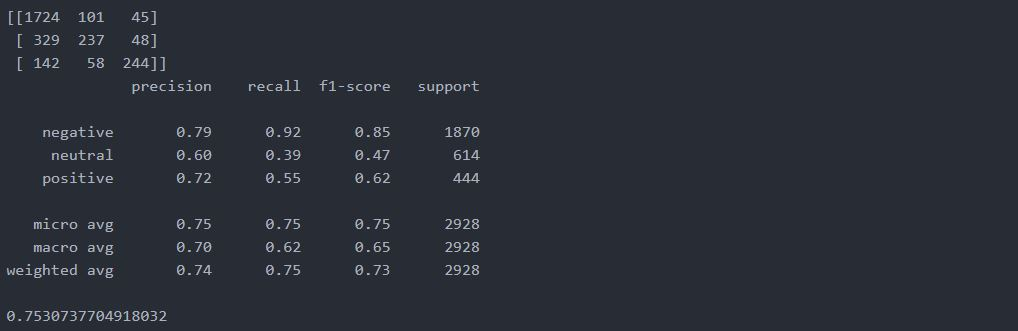

# ATTEMPT 2: Long Short Term Memory (LSTM) and Recurrent Neural Networks (RNN).

LSTM is a type of RNN network that can grasp long term dependence, capable of learning order dependence in sequence prediction problems. This behaviour is important in machine learning that requires complex problem domains like machine translation, text classification, speech recognition, and sentiment analysis. 

RNN was designed in such a way that they can catch the sequential/time series data. However, it suffers from vanishing gradients and exploding gradients - both related to how the network is trained. As such, LSTM was introduced to overcome this problem. (Dwivedi, 2020)


In [ ]:
#Reference link: https://analyticsindiamag.com/how-to-implement-lstm-rnn-network-for-sentiment-analysis/

# IMPORTING FILES AND LIBRARIES
At this stage is where we initialise importing the required libraries and the csv file that the model should train. 

The correct procedure for doing this is to first save the tweets extracted in the program above into a csv file, where it will be downloaded back here into this program. We will then be able to compare the accuracy of both such programs.

However for the purpose of attempting, we can include any csv file to test the program.

In [ ]:
# from google.colab import files

# df.to_csv('insertcsvfilehere.csv')
# files.download('insertcsvfilehere.csv')

In [ ]:
# import numpy as np
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils.np_utils import to_categorical
# import re

# from google.colab import files

# df.to_csv('insertcsvfilehere.csv')
# files.download('insertcsvfilehere.csv')

# print(df.columns)

This part will be only using the tweets and their corresponding sentiments. The new_df creats a new datafame that will only hold these two columns. We will also check the different sentiments present.

In [ ]:
# new_df = df[['text','sentiment']]

# print(data.sentiment)

In [ ]:
# new_df = new_df[new_df.sentiment != "Neutral"]
# new_df['text'] = new_df['text'].str.lower()
# new_df['text'] = new_df['text'].re.sub('[^a-zA-z0-9\s]')

This part defines the vocabulary size that is to be used and use the tokenizer to convert them into vectors. The X variable is used to store them. Then we will define the LSTM model architecture from embed_dim onwards.

My progress came to a halt when it came to vocabSize. Tried to resolve the issue but the deeper I searched into it, the deeper I got confused. 

"NameError: name 'vocabsize' is not defined". 

In [ ]:
# tokenizer = Tokenizer(num_words=1500, split=' ')
# tokenizer.fit_on_texts(data['text'].values)
# X = tokenizer.texts_to_sequences(new_df['text'])
# X = pad_sequences(X)

# embed_dim = 128
# lstm_out = 196
# model = Sequential()
# model.add(Embedding(vocabSize, embed_dim,input_length = 28)) 

# model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(2,activation='softmax'))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

This part encodes the sentiments using Label Encoder. The tweets are stored in X and the corresponding sentiments are stored in y.

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# Le = LabelEncoder()
# y = Le.fit_transform(new_df['sentiment'])


This part divides the data set into training sets and testing sets. After which, we will pass the training data and validation data to the model.

From the problem above, I 'hashtagged' the vocabSize and I am able to progress up to here. However I stumbled across another problem and I have no idea how to solve ever since. This is the error shown:

"train_test_split() error: Found input variables with inconsistent numbers of samples" --> based on test_size line

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)
# model.fit(X_train, Y_train,validation_data = (X_test,y_test),epochs = 10, batch_size=32)

# model.evaluate(X_test,y_test)

In [ ]:
# print("Prediction: ",model.predict_classes(X_test[5:10]))
# print("Actual: \n",y_test[5:10])

This would be the ideal result based on example.

![lstm rnn ccuracy result](https://drive.google.com/uc?id=1F09C3LLd-L6xJRwAw2SwKATGWWGo0vS8)


# ATTEMPT 3: IMPLEMENTATION SVM with SCIKIT-LEARN

SVM differs from the other classification algorithms in the way that it chooses the decision boundary that maximizes the distance from the nearest data points of all the classes. An SVM doesn't merely find a decision boundary; it finds the most optimal decision boundary.

This method works, but it only works for values and finds an optimal decision boundary. For my case, I need to tokenize the words, then vectorize it to map words to a corresponding number. Not ideal for my sentiment analysis.

*Bill authentication is the csv file based on the web example given.

In [ ]:
#link: https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# bankdata = pd.read_csv("bill_authentication.csv")
# bankdata.shape
# bankdata.head()

# X = bankdata.drop('Class', axis=1)
# y = bankdata['Class']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# from sklearn.svm import SVC
# svclassifier = SVC(kernel='linear')
# svclassifier.fit(X_train, y_train)

# y_pred = svclassifier.predict(X_test)

# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))